In [137]:
from sklearn.datasets import load_digits   

import matplotlib.pyplot as plt

digits = load_digits()  

In [138]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64)),
 'target': array([0, 1, 2, ..., 8, 9, 8], shape=(1797,)),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7'

<Figure size 640x480 with 0 Axes>

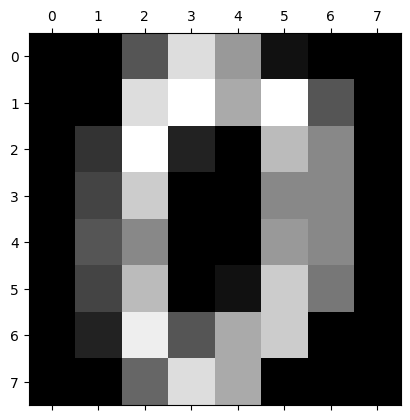

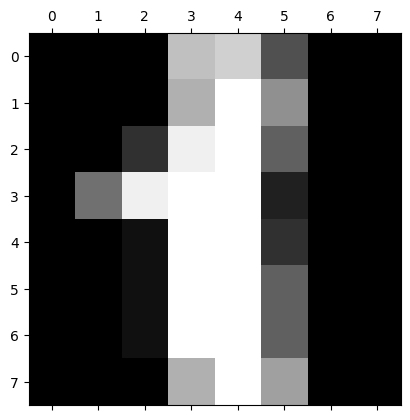

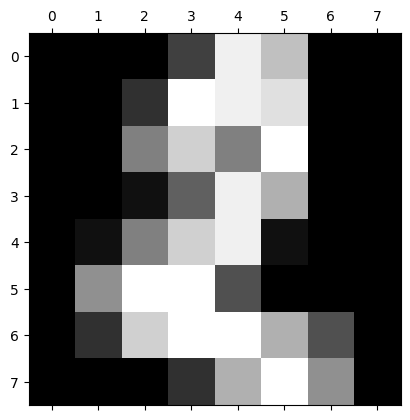

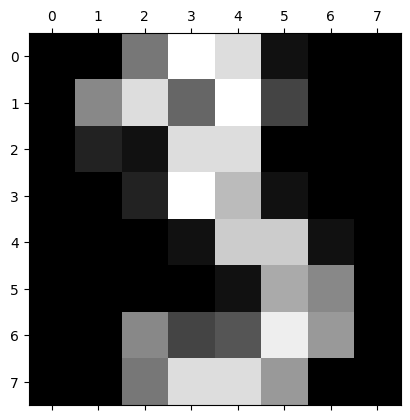

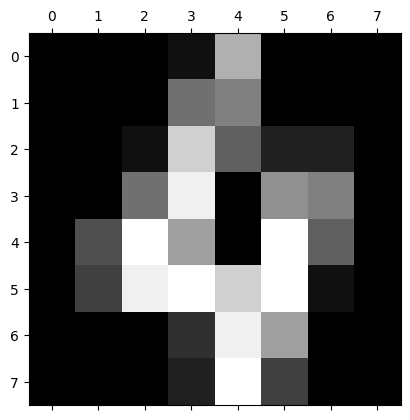

In [139]:
plt.gray() 
for i in range(5):
    plt.matshow(digits.images[i])   #عرض 5 صور

#ابعاد الصور الموجودة 8*8 

In [140]:
# كل صورة بيتم تمثيلها بأري 8*8 , كل بكسيل اله رقم بالارري
digits.data[0]    # اول صورة

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [141]:
digits.target[0]

np.int64(0)

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2)

In [143]:
X_train    

array([[ 0.,  0., 10., ...,  8., 14.,  7.],
       [ 0.,  0.,  0., ..., 15.,  4.,  0.],
       [ 0.,  0.,  5., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 16., 13.,  0.],
       [ 0.,  0.,  8., ...,  6.,  0.,  0.],
       [ 0.,  0.,  5., ...,  0.,  0.,  0.]], shape=(1437, 64))

In [144]:
X_train[0]         #صورة واحدة تمثل رقم واحد 

array([ 0.,  0., 10., 16., 16., 10.,  0.,  0.,  0.,  4., 16.,  6.,  1.,
       16.,  2.,  0.,  0.,  0., 10.,  0.,  1., 16.,  3.,  0.,  0.,  0.,
        0.,  0.,  5., 15.,  0.,  0.,  0.,  0.,  0.,  0., 11., 11.,  0.,
        0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  0.,  0.,  2., 13.,
       16., 12.,  8.,  0.,  0.,  0., 13., 15., 11.,  8., 14.,  7.])

In [145]:
y_train

array([2, 1, 9, ..., 6, 5, 7], shape=(1437,))

In [146]:
y_train[0]

np.int64(2)

<h5 style='color:red'>Logistic Regression</h5>

In [147]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)    #هان بندربه

c:\Users\Alaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [148]:
model.score(X_test, y_test)

0.9777777777777777

<h4 style='color:purple'>Confusion Matrix</h4>

Text(95.72222222222221, 0.5, 'Truth')

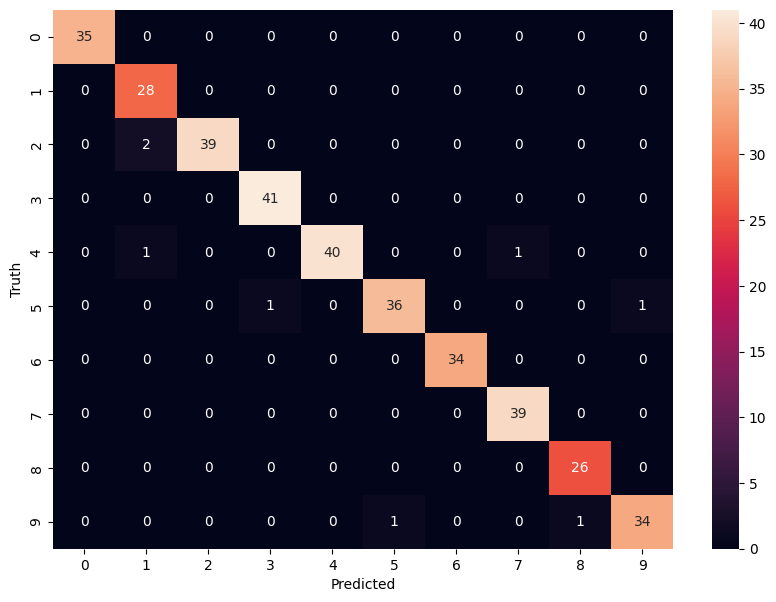

In [149]:
y_predicted = model.predict(X_test)   


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)

# رسم confusion_matrix 
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h5 style='color:red'>Decision Tree</h5>

In [150]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

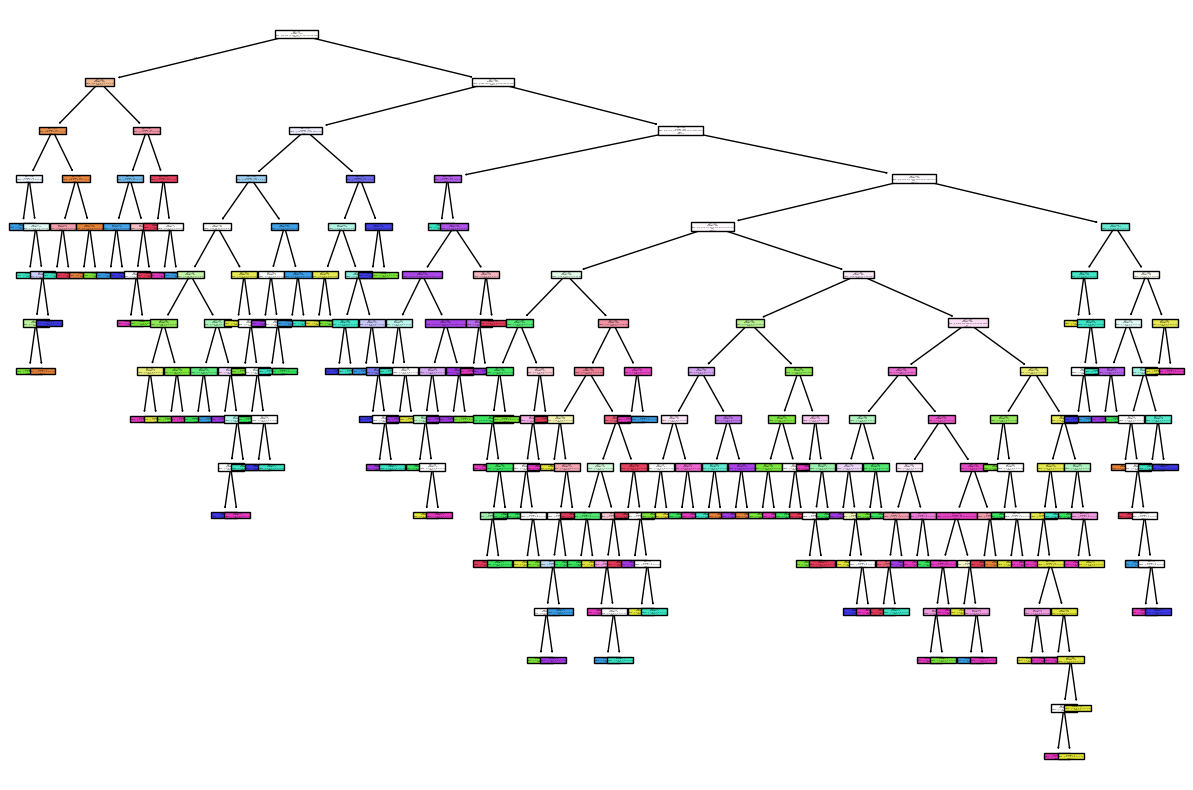

In [151]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# ضبط حجم الرسم حتى تكون الشجرة واضحة
plt.figure(figsize=(15,10))

# رسم شجرة القرار
plot_tree(dtree, filled=True, feature_names=[str(i) for i in range(64)], class_names=[str(i) for i in range(10)])

# عرض الرسم
plt.show()

In [152]:
# تقييم النموذج
accuracy = dtree.score(X_test, y_test)
print(f"Accuracy of Decision Tree: {accuracy:.2f}")

Accuracy of Decision Tree: 0.87


<h4 style='color:purple'>Confusion Matrix</h4>

Text(95.72222222222221, 0.5, 'Truth')

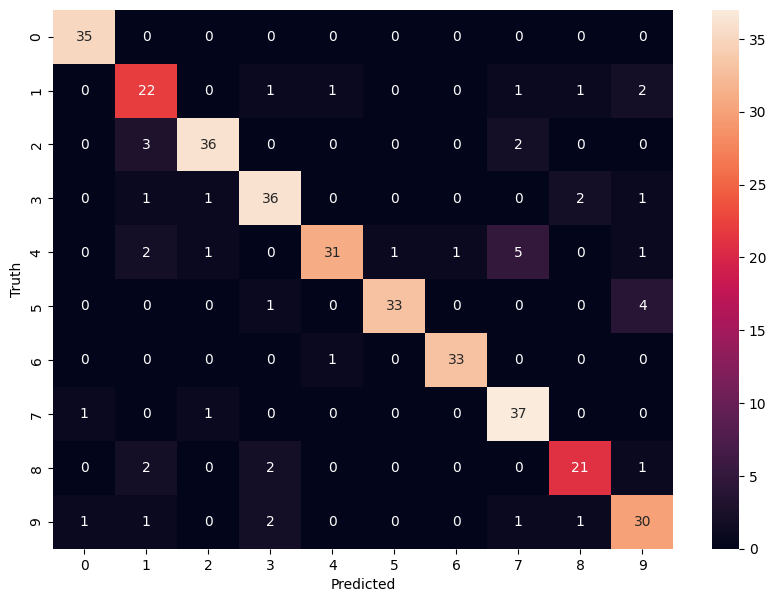

In [153]:
y_predicted = dtree.predict(X_test)   

cm = confusion_matrix(y_test, y_predicted)

# رسم confusion_matrix 
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h5 style='color:red'>KNN</h5>

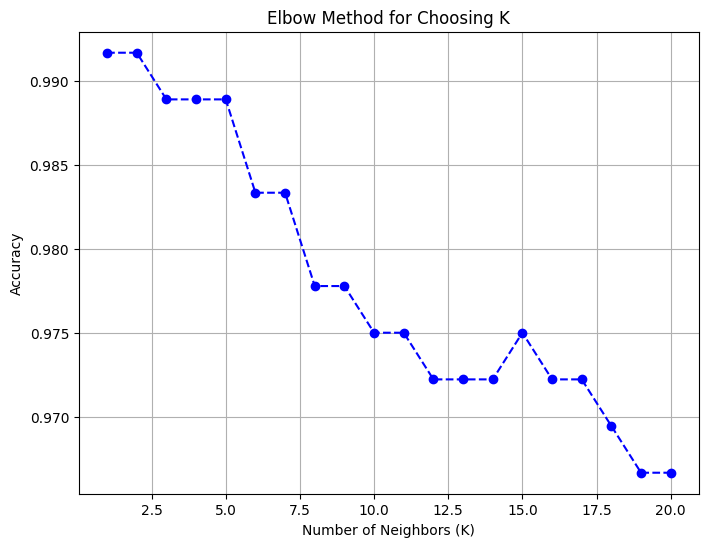

In [154]:
from sklearn.metrics import accuracy_score
k_values = range(1, 21)    #هلقيت بدنا ندرب المودل على كل قيم الكي ونحسب الاكيوريسي الهم كلهم
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Choosing K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [155]:
import numpy as np
# بدي اخلي المودل نفسه يختار مين احسن كي فيهم, مش انا الي اختار

optimal_k = k_values[np.argmax(accuracies)]
print("Optimal K:", optimal_k)

knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)
y_pred_optimal = knn_optimal.predict(X_test)
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
print("Accuracy with optimal K:", accuracy_optimal)

Optimal K: 1
Accuracy with optimal K: 0.9916666666666667


<h4 style='color:purple'>Confusion Matrix</h4>

Text(95.72222222222221, 0.5, 'Truth')

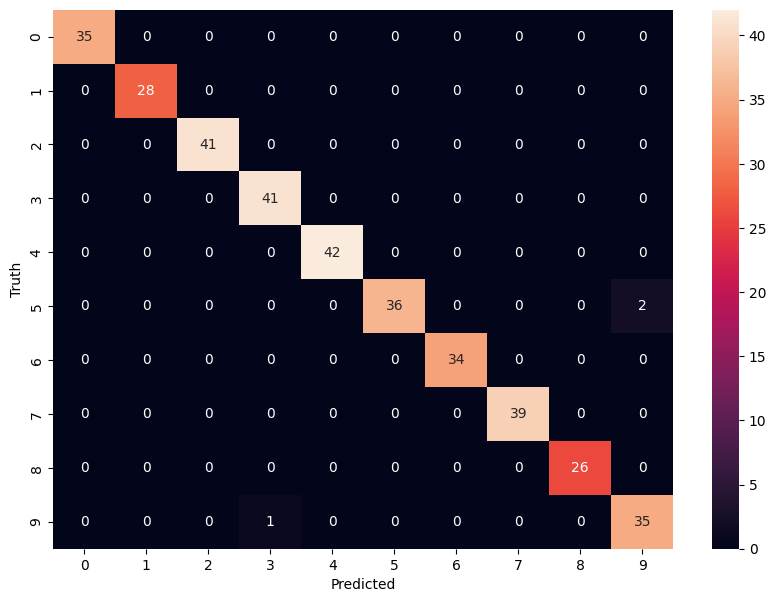

In [156]:
y_predicted = knn_optimal.predict(X_test)   

cm = confusion_matrix(y_test, y_predicted)

# رسم confusion_matrix 
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h5 style='color:red'>XGBoost </h5>

In [157]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

accuracy = xgb_model.score(X_test, y_test)  
print(f"XGBoost Accuracy: {accuracy:.2f}")


XGBoost Accuracy: 0.97


<h4 style='color:purple'>Confusion Matrix</h4>

Text(95.72222222222221, 0.5, 'Truth')

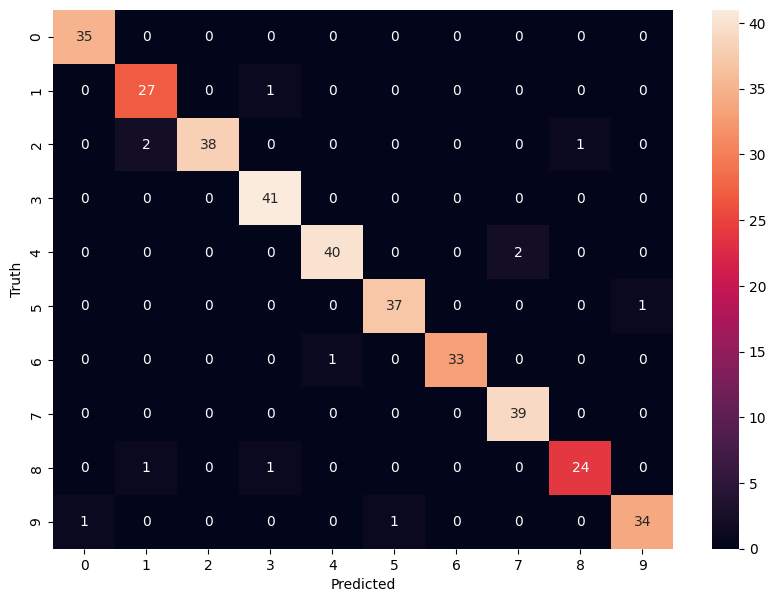

In [158]:
y_predicted = xgb_model.predict(X_test)   

cm = confusion_matrix(y_test, y_predicted)

# رسم confusion_matrix 
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')